<a href="https://colab.research.google.com/github/tainguyen30/AI-2022-2023/blob/main/2023%20BTC_Price_Prediction_in_30_days.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# First we will import the necessary Library 
import os
import pandas as pd
import numpy as np
import math
import datetime as dt

# For Evalution we will use these library
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

# For PLotting we will use these library
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
# Load our dataset 
# Note it should be in same dir
maindf=pd.read_csv('/content/BTC-USD 2014_2023.csv')
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])
maindf.shape

Total number of days present in the dataset:  3164
Total number of fields present in the dataset:  7


(3164, 7)

In [ ]:
# Viewing the first 5 lines
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/17/2014,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,9/18/2014,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,9/19/2014,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,9/20/2014,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,9/21/2014,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [ ]:
# Viewing the last 5 lines
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3159,5/12/2023,26987.66211,27055.64648,25878.42969,26804.99023,26804.99023,1.931360e+10
3160,5/13/2023,26807.76953,27030.48242,26710.87305,26784.07813,26784.07813,9.999172e+09
3161,5/14/2023,26788.97461,27150.97656,26661.35547,26930.63867,26930.63867,1.001486e+10
3162,5/15/2023,26931.38477,27646.34766,26766.09766,27192.69336,27192.69336,1.441323e+10
3163,5/16/2023,27171.22656,27297.75000,26878.94727,27023.26172,27023.26172,1.298952e+10


In [ ]:
# Print info about Dataframe
# Number of column, column labels, number of cells in each column (non-null values), column data types, memory usage
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3164 entries, 0 to 3163
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3164 non-null   object 
 1   Open       3164 non-null   float64
 2   High       3164 non-null   float64
 3   Low        3164 non-null   float64
 4   Close      3164 non-null   float64
 5   Adj Close  3164 non-null   float64
 6   Volume     3164 non-null   float64
dtypes: float64(6), object(1)
memory usage: 173.2+ KB


In [ ]:
# Return description of the data
# Numeric data
# count: the number of not-empty values, mean: the average value, std: standard deviation
# min: minimum value, 25%/50%/75%: 25%/50%/75% percentile
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3.164000e+03
mean,13367.719887,13698.559985,13003.831583,13374.702320,13374.702320,1.660910e+10
std,16038.811751,16444.369898,15573.719870,16035.706420,16035.706420,1.967190e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,736.317734,744.883255,730.288757,738.742493,738.742493,1.198100e+08
50%,7453.485840,7617.785889,7302.487060,7461.397949,7461.397949,9.615560e+09
75%,19343.587892,19656.905762,19025.690427,19354.905278,19354.905278,2.784107e+10
max,67549.734380,68789.625000,66382.062500,67566.828130,67566.828130,3.509680e+11


In [ ]:
# Checking null values 
print('Null Values:',maindf.isnull().values.sum())
print('NA values:',maindf.isnull().values.any())

Null Values: 0
NA values: False


In [ ]:
# Final shape of the dataset after dealing with null values 
maindf.shape

(3164, 7)

In [ ]:
# EDA (Exploratory Data Analysis)
# Steps involved in EDA: 
# Loading data -> Data Visualization -> Data Imputation -> Outlier Analysis -> Gathering Insights

# Printing the start date and End date of the dataset
sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]
print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 9/17/2014
Ending Date 5/16/2023


In [ ]:
# Analysis of year 2023
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%m/%d/%Y')
y_2023 = maindf.loc[(maindf['Date'] >= '1/1/2023')
                     & (maindf['Date'] <= '16/5/2023')]
y_2023.drop(y_2023[['Adj Close','Volume']],axis=1)

<ipython-input-71-7fcb53a40962>:4: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



,Date,Open,High,Low,Close
3028,2023-01-01,16547.91406,16630.43945,16521.23438,16625.08008
3029,2023-01-02,16625.50977,16759.34375,16572.22852,16688.47070
3030,2023-01-03,16688.84766,16760.44727,16622.37109,16679.85742
3031,2023-01-04,16680.20508,16964.58594,16667.76367,16863.23828
3032,2023-01-05,16863.47266,16884.02148,16790.28320,16836.73633
...,...,...,...,...,...
3159,2023-05-12,26987.66211,27055.64648,25878.42969,26804.99023
3160,2023-05-13,26807.76953,27030.48242,26710.87305,26784.07813
3161,2023-05-14,26788.97461,27150.97656,26661.35547,26930.63867
3162,2023-05-15,26931.38477,27646.34766,26766.09766,27192.69336


In [ ]:
monthvise= y_2023.groupby(y_2023['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,20043.860132,20250.717490
February,23304.086008,23304.539203
March,24945.340412,25116.900895
April,28823.841731,28857.574544
May,28026.644166,27889.460450
June,NaN,NaN
July,NaN,NaN
August,NaN,NaN
September,NaN,NaN


In [ ]:
# Bar graph between Open price & Close price
fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Open Price',
    marker_color='medium blue'
))

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Close Price',
    marker_color='red'
))

fig.update_layout(barmode='group', xaxis_tickangle=0, 
                  title='2023 Monthwise comparision between Open price and Close price')

fig.show()

In [ ]:
# Bar graph between High price & Low price
y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2023.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='High Price',
    marker_color='crimson'
))

fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Low Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', 
                  title='2023 Monthwise High and Low price')
fig.show()

In [ ]:
names = cycle(['Open Price','Close Price','High Price','Low Price'])

fig = px.line(y_2023, x=y_2023.Date, y=[y_2023['Open'], y_2023['Close'], 
                                          y_2023['High'], y_2023['Low']],
             labels={'Date': 'Date','value':'BTC value'})
fig.update_layout(title_text='BTC analysis chart', font_size=15, font_color='black',legend_title_text='BTC Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
# Building LSTM Model
# Steps:
# 1st step: Preparing Data for training and testing
# 1 year Data (2022)

# Lets First Take all the Close Price 
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (3164, 2)


In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close BTC'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2022', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
# Take data of 1 year 
closedf = closedf[closedf['Date'] >= '5/16/2022']
close_BTC = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  366


In [ ]:
closedf

,Date,Close
2798,2022-05-16,29862.91797
2799,2022-05-17,30425.85742
2800,2022-05-18,28720.27148
2801,2022-05-19,30314.33398
2802,2022-05-20,29200.74023
...,...,...
3159,2023-05-12,26804.99023
3160,2023-05-13,26784.07813
3161,2023-05-14,26930.63867
3162,2023-05-15,27192.69336


In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close BTC'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
# Normalizing Data (Chuẩn hoá dữ liệu)
# Goal: change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information
# MinMaxScaler: For each value in a feature, (MinMaxScaler - min)/range
# range: the difference between the original maximum and original minimum
# Preserve: the shape of the original distribution

# Deleting date column and normalizing using MinMax Scaler
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(366, 1)


In [ ]:
# We keep the training set as 60% and 40% testing set
training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (219, 1)
test_data:  (147, 1)


In [ ]:
# Transform the close price based on Time-series-analysis forecasting requirement
# Take 15

# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (203, 15)
y_train:  (203,)
X_test:  (131, 15)
y_test (131,)


In [ ]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (203, 15, 1)
X_test:  (131, 15, 1)


In [ ]:
# Model Building
model=Sequential()
model.add(LSTM(10,input_shape=(None,1),activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
# Train
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
7/7 [==============================] - 2s 68ms/step - loss: 0.1597 - val_loss: 0.4271
Epoch 2/200
7/7 [==============================] - 0s 31ms/step - loss: 0.1291 - val_loss: 0.3578
Epoch 3/200
7/7 [==============================] - 0s 30ms/step - loss: 0.1020 - val_loss: 0.2983
Epoch 4/200
7/7 [==============================] - 0s 29ms/step - loss: 0.0811 - val_loss: 0.2454
Epoch 5/200
7/7 [==============================] - 0s 35ms/step - loss: 0.0636 - val_loss: 0.2007
Epoch 6/200
7/7 [==============================] - 0s 32ms/step - loss: 0.0508 - val_loss: 0.1607
Epoch 7/200
7/7 [==============================] - 0s 37ms/step - loss: 0.0392 - val_loss: 0.1282
Epoch 8/200
7/7 [==============================] - 0s 41ms/step - loss: 0.0301 - val_loss: 0.1005
Epoch 9/200
7/7 [==============================] - 0s 40ms/step - loss: 0.0230 - val_loss: 0.0770
Epoch 10/200
7/7 [==============================] - 0s 30ms/step - loss: 0.0180 - val_loss: 0.0558
Epoch 11/200
7/7 [=

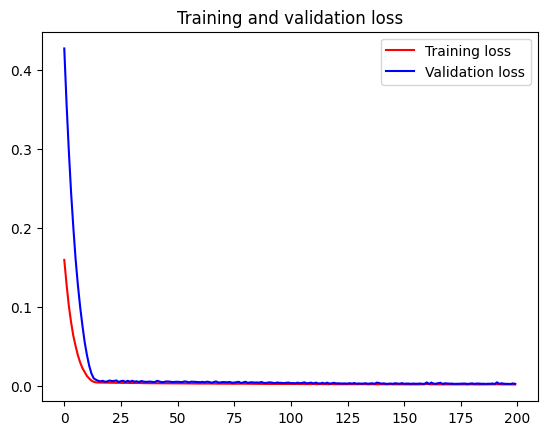

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plotting Loss and Validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
# Make the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

5/5 [==============================] - 0s 4ms/step


((203, 1), (131, 1))

In [ ]:
# Model Evaluation# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
# Evaluation metrices RMSE, MSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  750.801105350237
Train data MSE:  563702.2997951376
Train data MAE:  496.977774627463
-------------------------------------------------------------------------------------
Test data RMSE:  870.062806351166
Test data MSE:  757009.2869956667
Test data MAE:  613.0081854198472


In [ ]:
# Variance Regression Score
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9456718596730026
Test data explained variance regression score: 0.9463606508117169


In [ ]:
# R square score for regression
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.945609373525394
Test data R2 score: 0.9379818229140873


In [ ]:
# Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0012502352513494228
Test data MGD:  0.0013892952330585024
----------------------------------------------------------------------
Train data MPD:  26.282519279672613
Test data MPD:  32.13833120263957


In [ ]:
# Comparision of original Bitcoin close price and predicted close price
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

Train predicted data:  (366, 1)


In [ ]:
# Shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

Test predicted data:  (366, 1)


In [ ]:
names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_BTC['Date'],
                       'original_close': close_BTC['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'BTC price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
# Predicting next 30 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1  
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [ ]:
# Plotting last 15 days of dataset and next predicted 30 days
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [ ]:
predicted = np.empty((len(last_days)+pred_days+1,1))
predicted[:] = np.nan
predicted = predicted.reshape(1,-1).tolist()[0]

last_original_days_value = predicted
next_predicted_days_value = predicted

last_original_days_value[1:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step - 1:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

# print(last_original_days_value)
# print(next_predicted_days_value)

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'BTC price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
# Plotting entire closing BTC price with next 30 days period of prediction
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'BTC price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting 2023 whole closing BTC price in 30 days with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='BTC')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()